# 퍼셉트론이란?


퍼셉트론은 다수의 신호를 입력으로 받아 하나의 신호를 출력한다. 여기서 신호란 전류나 강물처럼 흐름이 있는 것이라고 생각하면 좋다
퍼셉트론은 1,0 또는 1,-1을 output으로 내보낸다.

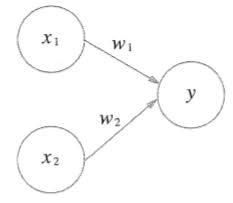

그림의 원을 뉴런 혹은 노드라고 부른다. 입력 신호가 뉴런에 보내질 때는 각각 고유한 가중치(w1,w2)가 곱해진다.
뉴런에서 보내온 신호의 총합이 정해진 한계를 넘어설 때에만 1을 출력한다.(활성화 함수를 사용한다. 종류로는 sigmoid, ReLU 등등)
,그 한계를 임계값이라 하고 기호는 세타를 쓴다.

![Image of Yaktocat](http://cfile9.uf.tistory.com/image/230C5A3B591DF0ED1B9BF7)

x값이 여러개 있는 퍼셉트론이다. , Bias는 편향이라고 부른다.

임계값을 넘어서 output이 1을 출력하면 다음 노드로 보내진다. 즉 신호가 필요해서 살렸다는 소리이다.

#  2.3 아이리스 데이터에 퍼셉트론 모델 훈련하기

In [3]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',header=None)
df.tail()
#판다 라이브러리를 사용해 iris데이터를 불러온다.

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


이제 앞에서부터 50개의  Iris-Setosa와 50개의 Iris-Versicolor에 해당하는 분류 레이블을 추출하여 각각을 1(Versicolor)와 -1(Setosa)로 변환한다

In [4]:
import matplotlib.pyplot as plt
import numpy as np
y = df.iloc[0:100, 4].values

In [5]:
print(y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor

In [6]:
y = np.where(y == 'Iris-setosa', -1 ,1)

In [7]:
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [8]:
X = df.iloc[0:100, [0,2]].values

In [9]:
print(X)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

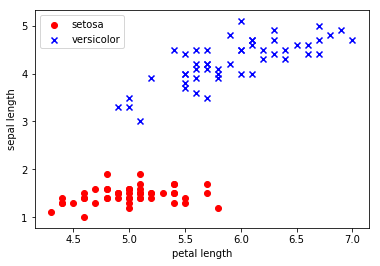

In [10]:
plt.scatter(X[:50,0], X[:50,1],
           color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100, 1],
           color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [11]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta*(target - self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

앞에서 추출한 아이리스 데이터의 부분집합에 우리의 퍼셉트론 알고리즘을 훈련시킬 차례다. 또한 알고리즘이 두개의 아이리스 꽃 분류를 나누는 결정 경계를 수렴하여 찾아내었는지 확인하기 위해 각 에포크에 대한 오분류 오차 플롯을 확인해야 한다.

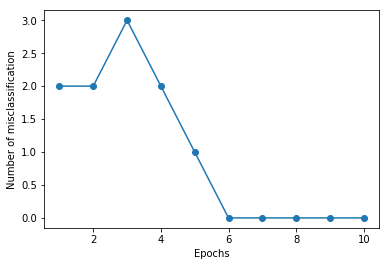

In [12]:
ppn = Perceptron(eta = 0.1, n_iter =10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_,
         marker ='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassification')
plt.show()

Epoch이 6일때부터 misclassification이 0이 되었다. 이제 훈련 샘플을 완벽하게 분류할 수 있을 것이다.
이제 2차원 데이터에 대한 결정 경계를 시각화 할 수 있는 작은 편의 함수를 구현해보자.

In [13]:
from matplotlib.colors import ListedColormap


In [14]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '∧','∨')
    colors = ('red', 'blue', 'lightgreen', 'gray' , 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min , x1_max = X[:,0].min() -1, X[:,0].max() +1
    x2_min , x2_max = X[:,1].min() -1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[ y == cl,0], y=X[ y == cl, 1],
                   alpha = 0.8, c = cmap(idx),
                   marker=markers[idx], label =cl)

위 코드에서 색color과 표식marker의 개수를 정의했고 ListedColormap을 사용해서 색 목록으로부터 색 지도를 만들었다.
이제 두 개의 피처에 대한 최소값과 최대값을 결정하고, 
이 피처 벡터들을 사용해서 Numpy meshgrid 함수를 통해 xx1, xx2그리드 배열 쌍을 생성하자. 
우리의 퍼셉트론 분류기를 2개의 피처 차원에 대해 훈련했기 때문에 predict 메서드를 사용해서 그리드 포인트에 해당하는 분류 레이블 z를 예측할 수 있도록 그리드 배열을 평평하게 해서 아이리스 훈련 데이터의 부분집합과 열의 개수가 같은 행렬을 생성해야 한다. 
예측된 분류 레이블 z를 xx1,xx2와 동일한 차원을 갖는 그리드에 재형성한 후, 
그리드 배열 내 각각의 예측된 분류에 대해서 서로 다른 결정 영역에는 서로 다른 색을 적용하는 matplotlib의 countourf함수를 사용하여 윤곽 플롯을 그릴수 있다.

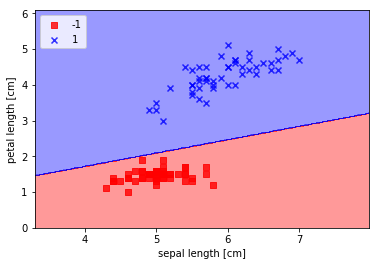

In [15]:
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

퍼셉트론은 아이리스 훈련데이터 부분 집합의 모든 꽃 샘플을 완벽하게 분류할 수 있는 결정경계를 학습했다.

# 에이다라인과 학습의 수렴

![Image of Yaktocat](http://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_vs_adaline.png)

에이다라인 알고리즘이 특히 흥미로운 이유는 비용함수를 정의하고 최소화하는 것을 그 주요 개념으로 설명하고 있기 때문이다.
퍼셉트론과 다른 점은 가중치가 퍼셉트론의 단위 계단 함수와 같은 것이 아닌, 선형 활성함수에 기초해서 업에디트 된다는 점이다.

# 2.3.2 파이썬으로 에이다라인 구현하기

fitt메서드를 변경함으롰서 그래이언트 디센트를 이요한 비용함수 최소화에 의해 가중치가 갱신되도록 한다.

In [16]:
class AdalineGD(object):
    def __init__(self, eta = 0.01, n_iter = 50):
        self.eta = eta
        self.n_iter = n_iter
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = ( y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() /2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)
    

위 코드를 보며, 퍼셉트론에서처럼 각각의 개별 훈련 샘플을 평가한 후 가중치를 업데이트하는 대신 0가중치에 대해서는 self.eta*errors.sum()을 사용하고 가중치 1~m 값에 대해서는 self.eta*X.T.dot(errors)를 사용하여, 전체 훈련 데이터에 대한 기울기를 계산한다.
여기서 X.T.dot(errors)는 우리의 피처행렬과 오차벡터사이의 행렬-벡터간 곱이다. 이전의 퍼셉트론 구현과 유사하게 훈련한 다음 알고리즘이 수렴되는지 여부를 확인하기 위해 self.cost_목록 내의 비용 값들을 수집한다.

학습률 테스트를 해본다, 하나는 eta1(learning rate) = 0.1,다른 하나는 eta2 = 0.0001   

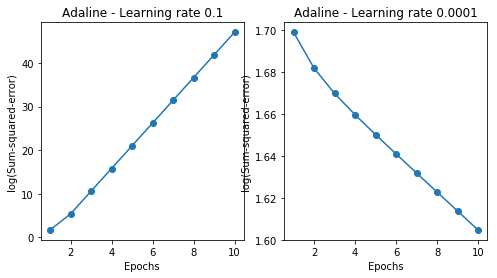

In [17]:
fig, ax = plt.subplots(nrows =1, ncols = 2, figsize = (8,4))
ada1 = AdalineGD(n_iter = 10, eta = 0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_)+1),
          np.log10(ada1.cost_), marker ='o')

ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter = 10, eta = 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_)+1),
          np.log10(ada2.cost_), marker ='o')

ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

learning rate는 사람이 잘 조절해야 하는 값이다 이런 값들을 하이퍼파라미터라고 한다.

learning rate가 너무 크면 발산해버리는 문제가 생기고, 너무 작으면 학습이 매우 느려진다, 따라서 적절하게 잡아야 한다.

또한 데이터들이 이뻐야 학습이 빨라진다. 데이터를 비교하기 쉽게 만드는 방법을 데이터 표준화라고 한다. 수치데이터 표준화는

![Image of Yaktocat](http://cfile23.uf.tistory.com/image/27781244592BAE3F0B05F4)

식이다.  우리는 데이터에 표준 정규분포의 성격을 부여하는 표준화하는 피처 스케일링 메서드를 사용할 것이다. 각 피처의 평균은 값 0에 중심을 두고 피처 열은 표준편차 1을 갖는다. xj는 전체 훈련 샘플 n중 j번째 피처값을 구성하는 벡터, 오메가j는 표준편차, Uj는 샘플 평균이다

In [18]:
X_std = np.copy(X)
X_std[:,0]=(X[:,0] - X[:,0].mean())/X[:,0].std()
X_std[:,1]=(X[:,1] - X[:,1].mean())/X[:,1].std()

위의 코드처럼 Numpy의 mean과 std를 사용하면 쉽게 표준화할 수 있다

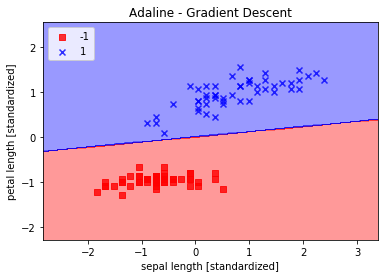

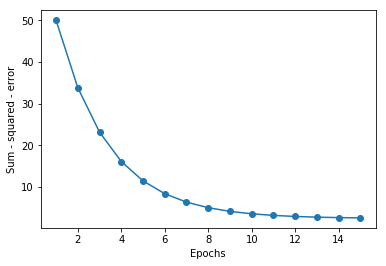

In [19]:
ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier = ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum - squared - error')
plt.show()

# Stochastic gradient descent (확률적 그래디언트 디센트)

지금까지 Loss function J(세타)의 값을 최소화하기 learning rate를 정하였다. 이때 Loss func을 계산할때 전체 train set를 사용했고 이것을 Batch gradient descent라고 부른다. 그러나 이 방식의 문제점은 한 learning rate(step)을 밟을 때 전체 데이터에 대한 Loss func을 구해야 하므로 train set이 엄청나게 많으면 그에 비례하게 오래 걸린다.이를 방지하기 위해 Stochastic gradient descent를 사용한다. 전체 train set을 계산해서 Loss func을 구해가는게 아니라 특정 mini-batch만큼 뽑아서 계산한구 Loss func을 구해나간다.
batch gradient descent보다는 부정확하지만 train 해야할 데이터가 확 줄었기 때문에 같은 시간안에 더 많은 step을 갈 수 있고 결국에는 좋은 성능을 보인다. 또한  local minima에 빠지지 않는다.

In [20]:
from numpy.random import seed

class AdalineSGD(object):
    def __init__(self, eta =0.01, n_iter =10,
                shuffle = True, random_state = None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        if random_state:
            seed(random_state)
            
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y= self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/ len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self , X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X ,y):
        r = np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        output = self.net_input(xi)
        error = (target - output )
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error **2
        return cost 
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return self.net_input(X)
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

위의 AdalineSGD 분류기에서 사용하고 있는 _shuffle 메서드는 numpy.random 의 permutation 함수를 통해 0에서 100까지의 고유 숫자를 임의의 시퀀스로 생성한다. 이 숫자들을 피처행렬과 분류레이블 벡터를 섞기 위한 색인으로 사용할 수 있다. 

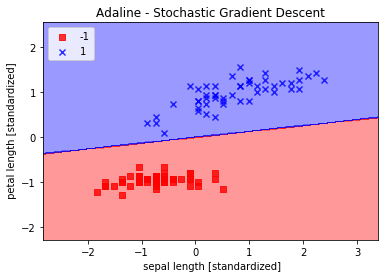

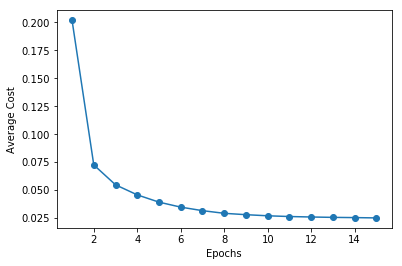

In [21]:
ada = AdalineSGD(n_iter= 15, eta = 0.01 , random_state =1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier = ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel(' sepal length [standardized]')
plt.ylabel(' petal length [standardized]')
plt.legend(loc = 'upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

위의 그래프를 보면 초반부터 평균비용은 대단히 빠르게 하락했다. 15에폭부터는 배치 그래디언트 디센트와 유사하다. 